In [9]:
import tensorflow as tf

In [30]:
import numpy as np
import os
import matplotlib 
import matplotlib.pyplot as plt
# 乱数をリセットし,グラフを初期化する関数
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

In [11]:
def save_fig(fig_id):
    path = os.path.join("./images/cnn",fig_id+".png")
    print("{}を保存しています".format(path))
    plt.savefig(path,format="png",dpi=300)

In [60]:
def plot_image(image):
    # グレー画像の描画関数
    # interpolation="nearest" : ブラーがかからないようにする
    # 軸の描画をoffにする
    plt.imshow(image,cmap="gray",interpolation="nearest")
    plt.axis("off")
def plot_color_image(image):
    # カラー画像の描画関数
    plt.imshow(image.astype(np.uint8),interpolation="nearest")
    plt.axis("off")

In [13]:
class SampleData:
    def __init__(self,width=64,height=64):
        self.width=width
        self.height=height
    def next_batch(self,batch_size):
        # サンプルデータを
        image_data_list = []
        label_data_list = []
        for i in range(batch_size):
            # サンプルの画像データ作成
            image = []
            image.append(np.random.random((1,self.width*self.height)))
            image.append(np.random.random((1,self.width*self.height)))
            image.append(np.random.random((1,self.width*self.height)))
            
            image_data_list.append(image)

            # サンプルのラベルデータ作成
            label = np.zeros((4,31))
            # one-hotデータにしたいので以下の手順を踏む
            for i in range(4):
                label_one_hot = np.random.randint(0,31)
                label[i][label_one_hot] = 1
            label_data_list.append(label)
        returned_data = []
        returned_data.append(image_data_list)
        returned_data.append(label_data_list)
        return returned_data

In [5]:
#　トイデータセットはscikitlearnのものを利用することにする
from sklearn.datasets import load_sample_image

/home/ogihara/machine_learning/myvenv/lib/python3.6/site-packages/sklearn/datasets/base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]
/home/ogihara/machine_learning/myvenv/lib/python3.6/site-packages/sklearn/datasets/base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]
/home/ogihara/machine_learning/myvenv/lib/python3.6/site-packages/sklearn/datasets/base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]
/home/ogihara/machine_learning/myvenv/lib/python3.6/site-packages/sklearn/datasets/base.py:762: DeprecationWa

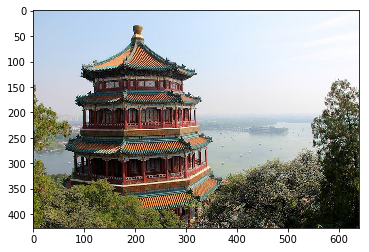

In [20]:
china = load_sample_image("china.jpg")
flower = load_sample_image("flower.jpg")
plt.imshow(china)                                       #画像が読み取れていることを確認
image = china[150:220,130:250]                           # 一部をトリミング
height,width,channels = image.shape                      # 各情報を取得
image_grayscale = image.mean(axis=2).astype(np.float32)  # RGBの平均値をとりグレースケールに変換
images = image_grayscale.reshape(1,height,width,1)    

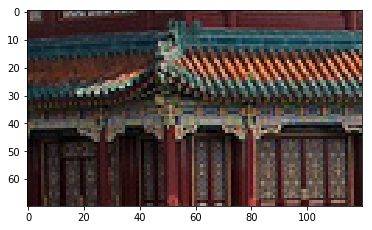

In [24]:
plt.imshow(image)   #ちなみにトリミング部分

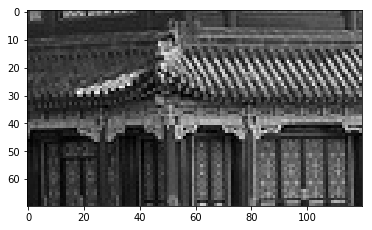

In [26]:
plt.imshow(image_grayscale,cmap="gray")  # ちなみにグレースケール

ではここでフィルターを作成してみる

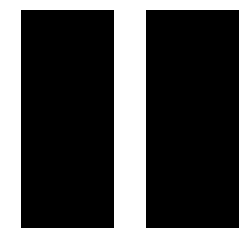

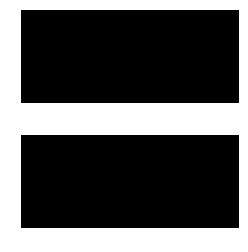

In [29]:
fmap = np.zeros(shape=(7,7,1,2),dtype=np.float32)   # 7x7のグレースケールのフィルタを２枚用意
fmap[:,3,0,0] = 1                                  # Num３番目の列一列の値を１に
fmap[3,:,0,1] = 1                                  # Num３番目の行一列の値を１に

plot_image(fmap[:,:,0,0])                          # 一枚目のフィルタを描画
plt.show()

plot_image(fmap[:,:,0,1])                          # 二枚目のフィルタを描画
plt.show()

# 簡単な畳み込みをしてみる

In [32]:
reset_graph()                                                     # グラフの初期化
X = tf.placeholder(tf.float32,shape=(None,height,width,1))        # 入力層。実行時に画像配列を受け取る
feature_maps = tf.constant(fmap)                                  # フィルタを読み込み（実際に深層学習をする際はここをvariableにして学習により決定されるようにする）
convolution = tf.nn.conv2d(X,feature_maps,strides = [1,1,1,1],padding="SAME") # 畳み込みpadding=SAMEなので一番外枠の画素と同じ画素数で外側を埋める

In [33]:
# セッションの実行
with tf.Session() as sess:
    output = convolution.eval(feed_dict={X:images})

./images/cnn/china_original.pngを保存しています


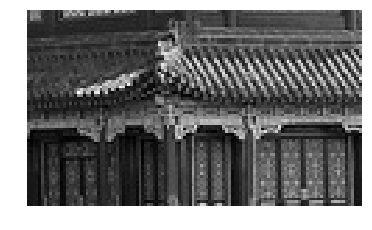

In [34]:
plot_image(images[0,:,:,0])  # 入力画像の一枚目（一枚しかない）の一個目の層（グレースケールなので一個しかない）
save_fig("china_original")
plt.show()

./images/cnn/china_vertical.pngを保存しています


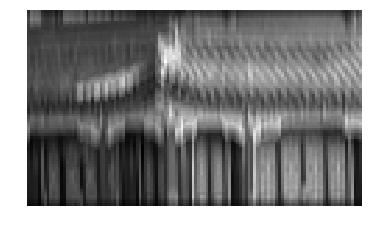

In [36]:
plot_image(output[0, :, :, 0])  # 出力画像の一個目のグレースケール
save_fig("china_vertical")
plt.show()

./images/cnn/china_horizontal.pngを保存しています


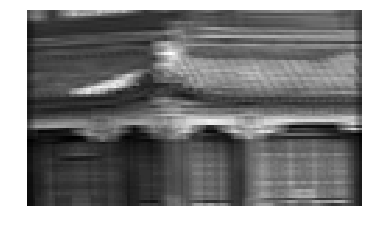

In [39]:
plot_image(output[0, :, :, 1])
save_fig("china_horizontal")
plt.show()

このように,畳み込みを行うとその畳み込みそうのフィルタの数だけ出力が吐き出される。
また出力画像は、そのフィルタによって,その画像に特徴的な線などが検出される（ぼんやり見るとわかる。。。かも）

In [40]:
import numpy as np
from sklearn.datasets import load_sample_image

# サンプル画像の読み込み
china = load_sample_image("china.jpg")
flower = load_sample_image("flower.jpg")
dataset = np.array([china,flower],dtype=np.float32)
batch_ize,height,width,channels = dataset.shape

/home/ogihara/machine_learning/myvenv/lib/python3.6/site-packages/sklearn/datasets/base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]
/home/ogihara/machine_learning/myvenv/lib/python3.6/site-packages/sklearn/datasets/base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]
/home/ogihara/machine_learning/myvenv/lib/python3.6/site-packages/sklearn/datasets/base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]
/home/ogihara/machine_learning/myvenv/lib/python3.6/site-packages/sklearn/datasets/base.py:762: DeprecationWa

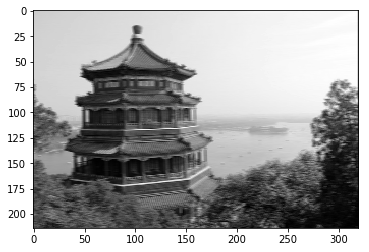

In [41]:
filters = np.zeros(shape=(7,7,channels,2),dtype=np.float32)
filters[:,3,:,0] = 1 # 縦ラインフィルタ
filters[3,:,:,1] = 1 # 横ラインフィルタ

X = tf.placeholder(tf.float32,shape=(None,height,width,channels))
convolution = tf.nn.conv2d(X,filters,strides = [1,2,2,1],padding="SAME")

with tf.Session() as sess:
    output = sess.run(convolution,feed_dict={X:dataset})
plt.imshow(output[0,:,:,1],cmap="gray")
plt.show()

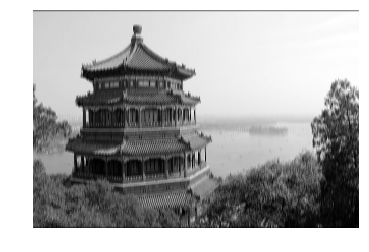

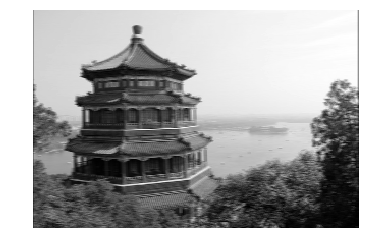

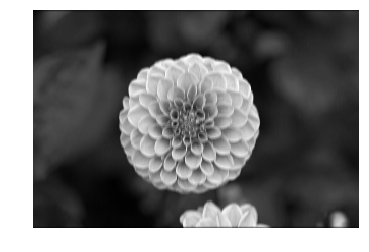

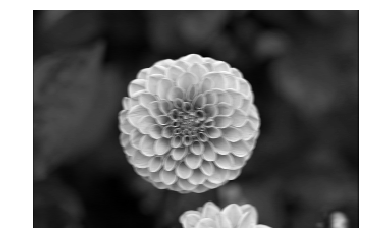

In [42]:
# 畳み込んだすべての画像出力を見てみる
for image_index in (0, 1):
    for feature_map_index in (0, 1):
        plot_image(output[image_index, :, :, feature_map_index])
        plt.show()


似たようなことをtensorflow.layers.conv2dを使ってやってみる
こちらは先程と違って引数にfilterの情報を与え、関数の内部でfilterを生成してもらう

In [43]:
reset_graph()
X = tf.placeholder(shape=(None,height,width,channels),dtype=tf.float32)
conv = tf.layers.conv2d(X,filters=2,kernel_size=7,strides=[2,2],padding="SAME")
init = tf.global_variables_initializer()

In [44]:
with tf.Session() as sess:
    init.run()
    output = sess.run(conv,feed_dict={X:dataset})

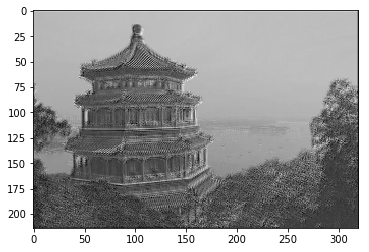

In [46]:
plt.imshow(output[0,:,:,1],cmap="gray" ) # 二枚目の出力を描画してみる
plt.show()

畳み込みの際のpaddingのvalidとsameでどのような違いがあるだろうか

In [49]:
reset_graph()

filter_primes = np.array([2.,3.,5.,7.,11.,13.],dtype=np.float32)        # 適当にフィルタを一枚作成
x = tf.constant(np.arange(1,13+1,dtype=np.float32).reshape([1,1,13,1])) # 適当に入力を作成
filters = tf.constant(filter_primes.reshape(1,6,1,1))                   # フィルタをtfで定義

valid_conv = tf.nn.conv2d(x,filters,strides=[1,1,5,1],padding='VALID')  # 畳み込みvalid(空白)
same_conv = tf.nn.conv2d(x,filters,strides=[1,1,5,1],padding='SAME')    # 畳み込みsame（同じ画素で広げる）

with tf.Session() as sess:
    print("VALID: \r\n{}".format(valid_conv.eval()))
    print("SAME : \r\n{}".format(same_conv.eval()))

VALID: 
[[[[184.]
   [389.]]]]
SAME : 
[[[[143.]
   [348.]
   [204.]]]]


VALIDのときには出力のshapeが小さくなった

わかりやすく書くとこんな計算が行われたのである

In [52]:
print("VALID:")
print(np.array([1,2,3,4,5,6]).T.dot(filter_primes))
print(np.array([6,7,8,9,10,11]).T.dot(filter_primes))
print("SAME:")
print(np.array([0,1,2,3,4,5]).T.dot(filter_primes))
print(np.array([5,6,7,8,9,10]).T.dot(filter_primes))
print(np.array([10,11,12,13,0,0]).T.dot(filter_primes))

VALID:
184.0
389.0
SAME:
143.0
348.0
204.0


# 次はプーリング層についてまとめて見る

In [54]:
batch_size , height , width , channels = dataset.shape

# まずは縦と横のフィルタを二枚作成してみる
filters = np.zeros(shape=(7,7,channels,2),dtype=np.float32)
filters[:,3,:,0] = 1
filters[3,:,:,1,] = 1

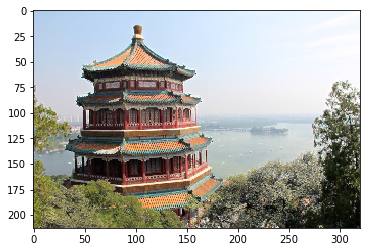

In [58]:
X = tf.placeholder(tf.float32,shape=(None,height,width,channels))
max_pool = tf.nn.max_pool(X,ksize=[1,2,2,1],strides=[1,2,2,1],padding="VALID")

with tf.Session() as sess:
    output = sess.run(max_pool,feed_dict={X:dataset})

plt.imshow(output[0].astype(np.uint8))
plt.show()

./images/cnn/china_original.pngを保存しています


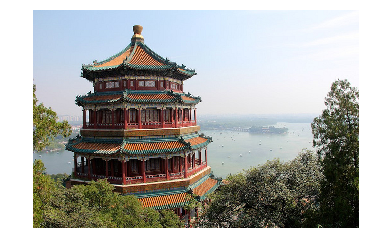

./images/cnn/china_max_pool.pngを保存しています


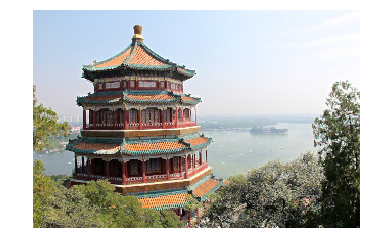

In [61]:
# 入力と出力を保存してみる
plot_color_image(dataset[0])
save_fig("china_original")
plt.show()
    
plot_color_image(output[0])
save_fig("china_max_pool")
plt.show()

# これでやっと準備が整った。MNISTを試してみよう！
本にはこの章で`tensorflow.contrib.layers`の`fully_connected()`や`conv2d()`,`dropout()`が使われているかもしれない。
しかし、このコードでは`tf.layers`の`dense()`,`conv2d()`,`dropout()`を使用することにする.
基本的に`contrib`モジュールはメソッドの消去,変更などが起こりうるのである。
書き方は少し違っているが内容は同じなのであしからず

In [81]:
reset_graph()
# モデルパラメータ

# 入力
height = 28
width = 28
channels = 1
n_inputs = height * width

# 畳み込み層１
conv1_fmaps = 32    # つまり出力される画像の数は32倍の数になる
conv1_ksize = 3     # 3x3のフィルタ
conv1_stride = 1    # フィルタは１マスごとにかけていきpadding=SAMEなので画像は小さくはならない
conv1_pad = "SAME"

#畳み込み層２
conv2_fmaps = 64   # 出力される画像の数は64倍になる
conv2_ksize = 3    # 3x3のフィルタ
conv2_stride = 2   # フィルタは2マスごとにかけていき、paddingSAMEなので画像は4分の１の大きさになる
conv2_pad = "SAME"

pool3_fmaps = conv2_fmaps

n_fc1 = 64         # 全結合層のユニット数
n_output = 10      # 出力

In [82]:
# 実際にモデルを定義していく
with tf.name_scope("inputs"):
    X = tf.placeholder(tf.float32,shape=[None,n_inputs],name="X")
    X_reshaped = tf.reshape(X,shape=[-1,height,width,channels])
    y = tf.placeholder(tf.int32,shape=[None],name="y")
    training = tf.placeholder_with_default(False, shape=[], name='training')
    
conv1 = tf.layers.conv2d(
    X_reshaped,
    filters=conv1_fmaps,
    kernel_size=conv1_ksize,
    strides=conv1_stride,
    padding=conv1_pad,
    activation=tf.nn.relu,
    name="conv1"
)
conv2 = tf.layers.conv2d(
    conv1,
    filters=conv2_fmaps,
    kernel_size=conv2_ksize,
    strides=conv2_stride,
    padding=conv2_pad,
    activation=tf.nn.relu,
    name="conv2"
)

with tf.name_scope("pool3"):
    pool3 = tf.nn.max_pool(conv2,ksize=[1,2,2,1],strides=[1,2,2,1],padding="VALID")
    pool3_flat = tf.reshape(pool3,shape=[-1,pool3_fmaps*7*7]) # 前の畳み込み層でstrideが2だったので画像のサイズは1/4の7x7になっている
with tf.name_scope("fc1"):
    # 全結合
    fc1 = tf.layers.dense(pool3_flat, n_fc1, activation=tf.nn.relu, name="fc1")
    
with tf.name_scope("output"):
    # 出力
    logits = tf.layers.dense(fc1,n_output,name="output")
    Y_proba = tf.nn.softmax(logits,name="Y_proba")
    
with tf.name_scope("train"):   # 学習フェーズでのoperation
    # 交差エントロピーの計算
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits,labels=y)
    # 損失関数の定義
    loss = tf.reduce_mean(xentropy)
    # 最適化関数
    optimizer = tf.train.AdamOptimizer()
    # 誤差の最小化のoperation
    training_op = optimizer.minimize(loss)
with tf.name_scope("eval"):   # テストフェーズでのoperation
    
    correct = tf.nn.in_top_k(logits,y,1)   # in_topp_k : 正解と等しいかどうかbool型で返される
    accuracy = tf.reduce_mean(tf.cast(correct,tf.float32))     # tf.castは型変換を意味する.おそらくTrueは1.0に,Falseは0になるのでは？そしてそれの平均をとる？
    
with tf.name_scope("init_and_save"):
    init = tf.global_variables_initializer()
    saver = tf.train.Saver()

    

In [83]:
# ここで実際に使用するデータを用意する
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/")

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [86]:
def get_model_params():
    gvars = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES)
    return {gvar.op.name: value for gvar, value in zip(gvars, tf.get_default_session().run(gvars))}

def restore_model_params(model_params):
    gvar_names = list(model_params.keys())
    assign_ops = {gvar_name: tf.get_default_graph().get_operation_by_name(gvar_name + "/Assign")
                  for gvar_name in gvar_names}
    init_values = {gvar_name: assign_op.inputs[1] for gvar_name, assign_op in assign_ops.items()}
    feed_dict = {init_values[gvar_name]: model_params[gvar_name] for gvar_name in gvar_names}
    tf.get_default_session().run(assign_ops, feed_dict=feed_dict)

In [87]:
n_epochs = 1000
batch_size = 50

best_loss_val = np.infty
check_interval = 500
checks_since_last_progress = 0
max_checks_without_progress = 20
best_model_params = None 

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch, training: True})
            if iteration % check_interval == 0:
                loss_val = loss.eval(feed_dict={X: mnist.validation.images,
                                                y: mnist.validation.labels})
                if loss_val < best_loss_val:
                    best_loss_val = loss_val
                    checks_since_last_progress = 0
                    best_model_params = get_model_params()
                else:
                    checks_since_last_progress += 1
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_val = accuracy.eval(feed_dict={X: mnist.validation.images,
                                           y: mnist.validation.labels})
        print("Epoch {}, train accuracy: {:.4f}%, valid. accuracy: {:.4f}%, valid. best loss: {:.6f}".format(
                  epoch, acc_train * 100, acc_val * 100, best_loss_val))
        if checks_since_last_progress > max_checks_without_progress:
            print("Early stopping!")
            break

    if best_model_params:
        restore_model_params(best_model_params)
    acc_test = accuracy.eval(feed_dict={X: mnist.test.images,
                                        y: mnist.test.labels})
    print("Final accuracy on test set:", acc_test)
    save_path = saver.save(sess, "./my_mnist_model")

Epoch 0, train accuracy: 98.0000%, valid. accuracy: 97.9600%, valid. best loss: 0.072223
Epoch 1, train accuracy: 100.0000%, valid. accuracy: 98.0200%, valid. best loss: 0.052332
Epoch 2, train accuracy: 100.0000%, valid. accuracy: 98.5200%, valid. best loss: 0.052332
Epoch 3, train accuracy: 98.0000%, valid. accuracy: 98.7800%, valid. best loss: 0.041712
Epoch 4, train accuracy: 100.0000%, valid. accuracy: 98.9600%, valid. best loss: 0.041712
Epoch 5, train accuracy: 98.0000%, valid. accuracy: 98.9000%, valid. best loss: 0.040111
Epoch 6, train accuracy: 100.0000%, valid. accuracy: 98.9400%, valid. best loss: 0.040111
Epoch 7, train accuracy: 100.0000%, valid. accuracy: 99.0200%, valid. best loss: 0.040111
Epoch 8, train accuracy: 100.0000%, valid. accuracy: 98.8800%, valid. best loss: 0.040111
Epoch 9, train accuracy: 100.0000%, valid. accuracy: 98.9600%, valid. best loss: 0.040111
Epoch 10, train accuracy: 100.0000%, valid. accuracy: 99.0800%, valid. best loss: 0.040111
Epoch 11, tr